In [1]:
#Bag of Words model based project

#BoW model a sentence or a document is considered as a 'Bag' containing words. It will take into account the words and 
#their frequency of occurrence in the sentence or the document disregarding semantic relationship in the sentences

#refer images in desktop for svm and bayes

import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
a = "The dog is on the table"

In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
c_vec = CountVectorizer()
count_occurs = c_vec.fit_transform([a]) 

In [6]:
 corpus = ['This is the first document.', 'This is the second second document.', 'And the third one.', 'Is this the first document?',]

In [7]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [8]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [9]:
print(X.toarray()) 

[[0 1 1 1 0 0 1 0 1]
 [0 1 0 1 0 2 1 0 1]
 [1 0 0 0 1 0 1 1 0]
 [0 1 1 1 0 0 1 0 1]]


In [10]:
# Convert the sparse matrix representation into dataframe with columns words and count
count_occur_df = pd.DataFrame((count, word) for word, count in zip(count_occurs.toarray().tolist()[0],
                                                                   c_vec.get_feature_names()))
#The purpose of zip() is to map the similar index of multiple 
#containers so that they can be used just using as single entity.

count_occur_df.columns = ['Word', 'Count']
count_occur_df.sort_values('Count', ascending=False, inplace=True)
count_occur_df

,Word,Count
4,the,2
0,dog,1
1,is,1
2,on,1
3,table,1


In [11]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
import pandas as pd
from wordcloud import WordCloud
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

In [12]:
#DATA PREPROCESSING BELOW

In [13]:
df = pd.read_csv('imdb_master.csv', error_bad_lines = False, encoding = 'ISO-8859-1', index_col = 0)
#if a csv line has too many commas it will raise exception and not return df
#error_bad_lines ignores such problems
print(df.head())
df.drop(['file'], axis = 1, inplace = True)

   type                                             review label         file
0  test  Once again Mr. Costner has dragged out a movie...   neg      0_2.txt
1  test  This is an example of why the majority of acti...   neg  10000_4.txt
2  test  First of all I hate those moronic rappers, who...   neg  10001_1.txt
3  test  Not even the Beatles could write songs everyon...   neg  10002_3.txt
4  test  Brass pictures (movies is not a fitting word f...   neg  10003_3.txt


In [14]:
df.head()

,type,review,label
0,test,Once again Mr. Costner has dragged out a movie...,neg
1,test,This is an example of why the majority of acti...,neg
2,test,"First of all I hate those moronic rappers, who...",neg
3,test,Not even the Beatles could write songs everyon...,neg
4,test,Brass pictures (movies is not a fitting word f...,neg


In [15]:
#TEXT PREPROCESSING BELOW

In [16]:
stemmer = SnowballStemmer('english')

#an example
print(stemmer.stem(WordNetLemmatizer().lemmatize('running', pos='a')))

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result


for i in range(df.shape[0]):
    strs = []
    strs1 = df.iloc[i][1].replace("<br />" ,"").lower()
    strs = preprocess(strs1)
    strs1 = ""
    for j in range(len(strs)):
        strs1 += strs[j] + " "
    df.iloc[i][1] = strs1
    if i % 10000 == 0:
        print("", i/1000 , "% completed")


run
 0.0 % completed
 10.0 % completed
 20.0 % completed
 30.0 % completed
 40.0 % completed
 50.0 % completed
 60.0 % completed
 70.0 % completed
 80.0 % completed
 90.0 % completed


In [17]:
df.label.value_counts()

unsup    50000
pos      25000
neg      25000
Name: label, dtype: int64

In [18]:
df1=df.copy()

In [19]:
df1 = df1[df1.label != 'unsup'] 

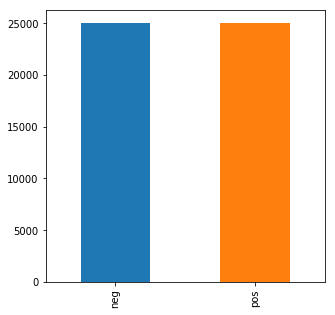

In [20]:
df1.label.value_counts().plot(kind='bar',figsize=(5,5))

In [21]:
df1.head()

,type,review,label
0,test,costner drag movi longer necessari asid terrif...,neg
1,test,exampl major action film generic bore worth wa...,neg
2,test,hate moron rapper press forehead curs shoot ac...,neg
3,test,beatl write song like walter hill second come ...,neg
4,test,brass pictur movi fit word somewhat brassi all...,neg


In [22]:
df1['b_label']=df1['label'].map({'neg':0,'pos':1})

In [23]:
#SENTIMENT ANALYSIS BELOW

In [24]:
#2 algos 
# 1. Multinomial Naive Baiyes
# 2. Support Vector Machines

In [25]:
count_vectorizer = CountVectorizer()#Design the Vocabulary
# The default token pattern removes tokens of a single character. 
bag_of_words = count_vectorizer.fit_transform(df1['review'])#Create the Bag-of-Words Model

In [26]:
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, df1['b_label'], test_size=0.20, random_state=42)

In [27]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()

In [28]:
model.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [29]:
predict=model.predict(X_test)

In [30]:
from sklearn.metrics import f1_score
f1_score(y_test, predict, average='macro')  

0.8531169705258024

In [31]:
from sklearn.metrics import confusion_matrix

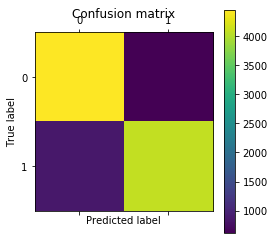

In [43]:
cm = confusion_matrix(y_test, predict)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [40]:
from sklearn.metrics import classification_report
print (classification_report(y_test, predict))
#precison = true positive / (true positive + false positive)
#recall = true positive / (true positive + false negative)

#false negative : predicted as negative but actually positive
#false positive : predicted as positive but actually negative

#Email spam : User might lose important emails if precison is not high
#Cancer detection : User might be told he is fine when really he is not
#f1 score = 2 * precision * recall / (precision + recall)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      5055
           1       0.87      0.83      0.85      4945

   micro avg       0.85      0.85      0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



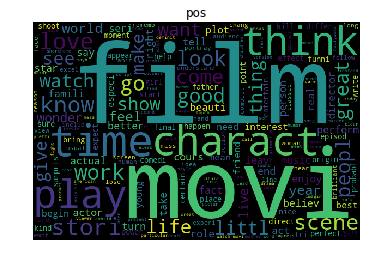

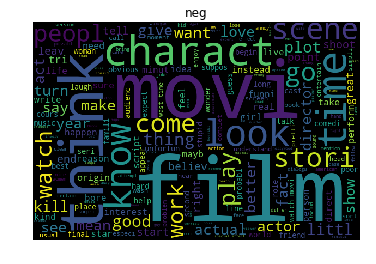

In [41]:
def visualize(label):
    words = ''
    for msg in df[df['label']==label]['review']:
        msg=msg.lower()
        words+=msg+ ''
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(label)
    plt.show()
visualize('pos')
visualize('neg')

In [44]:
#Support Vector Classifier

In [45]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5)

In [46]:
clf.fit(X_train,y_train)

C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

In [47]:
predict=clf.predict(X_test)

In [48]:
from sklearn import metrics
acc_score = metrics.accuracy_score(y_test, predict)
f1_score = metrics.f1_score(y_test, predict, average='macro')
print('Total accuracy classification score: {}'.format(acc_score))
print('Total F1 classification score: {}'.format(f1_score))

Total accuracy classification score: 0.8601
Total F1 classification score: 0.860078137208939


In [49]:


# ABOVE WAS BOW METHOD
#BELOW IS USING TF-IDF



In [50]:
#TF : Term Frequency is the ratio of the number of times a word occurs in a text to the total number of words in that text.

#IDF : Inverse Term Frequency is the ratio of the total number of texts to the number of texts which contain the
#      specific words that we are looking for.

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df1.review)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(features, df1['b_label'], test_size=0.20, random_state=42)

In [53]:
#Multinomial Naive Bayes

In [54]:
model=MultinomialNB() 
model.fit(X_train,y_train)
predict=model.predict(X_test)

In [55]:
acc_score = metrics.accuracy_score(y_test, predict)
f1_score = metrics.f1_score(y_test, predict, average='macro')
print('Total accuracy classification score: {}'.format(acc_score))
print('Total F1 classification score: {}'.format(f1_score))

Total accuracy classification score: 0.8739
Total F1 classification score: 0.8738929064759893


In [56]:
#SVC

In [57]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5)

In [58]:
clf.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

In [59]:
from sklearn import metrics
pred = clf.predict(X_test)
acc_score = metrics.accuracy_score(y_test, pred)
f1_score = metrics.f1_score(y_test, pred, average='macro')

print('Total accuracy classification score: {}'.format(acc_score))
print('Total F1 classification score: {}'.format(f1_score))

Total accuracy classification score: 0.8983
Total F1 classification score: 0.8982998769428512
